<a href="https://colab.research.google.com/github/LeeHuiJong/SkillTreePython-DataAnalysis/blob/main/ch02_11_%EC%8B%A4%EC%A0%84_%EC%9E%AC%EC%A0%95%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%8B%9C%EA%B0%81%ED%99%94_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ch02.11. 실전-재정데이터 시각화 경진대회

---

* 날짜:
* 이름:

[재정 데이터 시각화 경진대회](https://dacon.io/competitions/official/235767/overview/description)

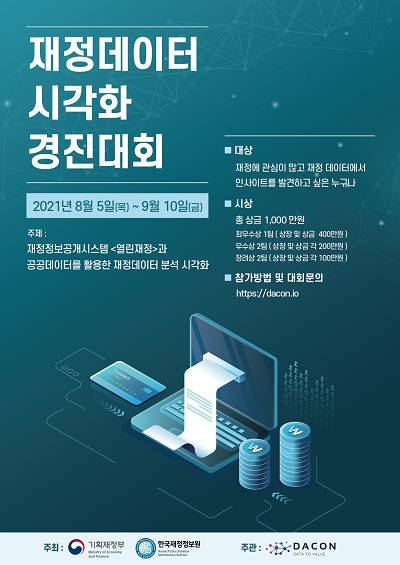

## Step 1 : 시작 해보기
---

**주제** : 연도에 따른 분야별 재정지출 추이 및 비율 시각화

### | **환경세팅**

* matplotlib에서 사용할 수 있는 폰트 확인

In [6]:
import matplotlib.font_manager as fm

In [7]:
for font in fm.fontManager.ttflist:     # 한글 데이터이기 때문에 폰트가 필요함
  print(font.name)

cmtt10
STIXNonUnicode
DejaVu Sans Mono
STIXSizeFiveSym
STIXNonUnicode
STIXGeneral
STIXSizeOneSym
STIXSizeTwoSym
cmex10
DejaVu Sans Display
DejaVu Sans
DejaVu Serif
cmmi10
DejaVu Serif
DejaVu Serif
STIXSizeTwoSym
STIXSizeFourSym
DejaVu Sans
STIXNonUnicode
DejaVu Serif
STIXSizeOneSym
STIXSizeFourSym
cmb10
cmr10
DejaVu Sans Mono
STIXNonUnicode
STIXGeneral
STIXGeneral
STIXSizeThreeSym
DejaVu Sans Mono
DejaVu Sans
cmsy10
DejaVu Serif Display
STIXGeneral
DejaVu Sans
STIXSizeThreeSym
DejaVu Sans Mono
cmss10
NanumSquareRound
NanumGothic
NanumGothic
Liberation Sans
Liberation Sans Narrow
Liberation Mono
Liberation Sans
Liberation Serif
NanumMyeongjo
Liberation Mono
Liberation Serif
NanumMyeongjo
NanumSquare
NanumSquareRound
Liberation Sans
Liberation Sans Narrow
Liberation Sans
Humor Sans
Liberation Sans Narrow
NanumBarunGothic
Liberation Mono
NanumSquare
NanumBarunGothic
Liberation Sans Narrow
Liberation Serif
Liberation Mono
Liberation Serif


* 한글 폰트 설치

In [2]:
# 폰트 설정이 잘 안 된다면 해당 셀의 마지막 줄 주석을 풀고 실행해 보세요.
# colab 사용시에도 아래 함수를 활용해 보세요.
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux(colab)
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

* 라이브러리 임포트 및 세팅

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob, os

sns.set(font_scale=1.2, style='white', palette='tab20')
plt.rcParams['font.family']=get_font_family() 

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


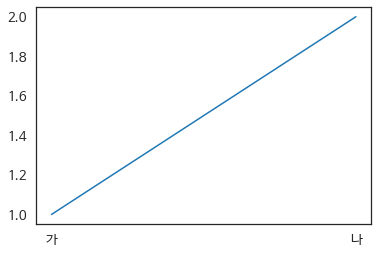

In [4]:
x=['가','나']
y=[1,2]
plt.plot(x,y)

* 드라이브 마운트

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
with open('/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat '/gdrive/My Drive/foo.txt'

* 라이브러리 소개 : `tree` : 디렉토리 트리구조를 확인할 수 있다.

In [9]:
! sudo apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (137 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend:

### | **데이터 확보**

데이터를 처리 하기 전 Step1 에서 진행 할 주제를 정의합니다. 

공공질서 및 안전분야 분야별 재정구조 예산 추이(지난 6~7년)

* 경로 설정

In [13]:
df_path='/content/gdrive/MyDrive/딥러닝프레임워크실무/Data analysis/데이터  시각화/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출'

* 트리를 이용해 하위 폴더 구조 확인

In [ ]:
! tree '/content/gdrive/MyDrive/딥러닝프레임워크실무/Data analysis/데이터  시각화/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출'

* 하위폴더 확인 및 정의

In [18]:
fields = os.listdir(df_path)
fields=['사회복지 분야',
 '농림수산 분야',
 '공공질서 및 안전 분야',
 '국토 및 지역개발 분야',
 '보건 분야',
 '교통 및 물류 분야',
 '과학기술 분야',
 '교육 분야',
 '문화 및 관광 분야',
 '국방 분야',
 '통신 분야',
 '환경 분야',
 '일반·지방행정 분야',
 '통일·외교 분야',
 '산업·중소기업 및 에너지 분야']

In [19]:
fields

['사회복지 분야',
 '농림수산 분야',
 '공공질서 및 안전 분야',
 '국토 및 지역개발 분야',
 '보건 분야',
 '교통 및 물류 분야',
 '과학기술 분야',
 '교육 분야',
 '문화 및 관광 분야',
 '국방 분야',
 '통신 분야',
 '환경 분야',
 '일반·지방행정 분야',
 '통일·외교 분야',
 '산업·중소기업 및 에너지 분야']

* 분야별 데이터 프레임 확보

In [21]:
df_path

'/content/gdrive/MyDrive/딥러닝프레임워크실무/Data analysis/데이터  시각화/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출'

In [25]:
dfs=[]
for field in fields:
  f = f'{df_path}/{field}/{field} 재정구조.CSV'
  print(field, f)
  df = pd.read_csv(f, encoding='CP949')
  dfs.append(df)

  #print(os.path.isfile(f) ) # 파일 f가 존재하는지 확인

사회복지 분야 /content/gdrive/MyDrive/딥러닝프레임워크실무/Data analysis/데이터  시각화/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출/사회복지 분야/사회복지 분야 재정구조.CSV
농림수산 분야 /content/gdrive/MyDrive/딥러닝프레임워크실무/Data analysis/데이터  시각화/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출/농림수산 분야/농림수산 분야 재정구조.CSV
공공질서 및 안전 분야 /content/gdrive/MyDrive/딥러닝프레임워크실무/Data analysis/데이터  시각화/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출/공공질서 및 안전 분야/공공질서 및 안전 분야 재정구조.CSV
국토 및 지역개발 분야 /content/gdrive/MyDrive/딥러닝프레임워크실무/Data analysis/데이터  시각화/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출/국토 및 지역개발 분야/국토 및 지역개발 분야 재정구조.CSV
보건 분야 /content/gdrive/MyDriv

* 각 데이터 프레임 확인

In [32]:
print(fields[0])
dfs[0] # n번째 데이터 프레임

사회복지 분야


,연도,기준,합계예산(억원),부문당 예산(억원),프로그램당 예산(억원),단위사업당 예산(억원),세부사업당 예산(억원)
0,2015,결산,1070096,118900,14862,3006,1205
1,2016,결산,1124165,124907,15400,3417,1505
2,2017,결산,1210037,134449,16134,3580,1598
3,2018,결산,1360380,151153,18138,3966,1771
4,2019,결산,1548464,129039,21809,4779,2027
5,2020,본예산,1670211,139184,24206,5203,2163
6,2021,본예산,1850459,154205,26818,5659,2328


In [29]:
print(fields[1])
dfs[1]

농림수산 분야


,연도,기준,합계예산(억원),부문당 예산(억원),프로그램당 예산(억원),단위사업당 예산(억원),세부사업당 예산(억원)
0,2015,결산,191130,47783,3901,787,275
1,2016,결산,187369,46842,3824,794,301
2,2017,결산,193670,48418,3873,821,306
3,2018,결산,195821,48955,3766,823,298
4,2019,결산,204327,51082,4984,771,302
5,2020,본예산,215153,53788,5248,844,310
6,2021,본예산,226557,56639,5526,903,326


In [31]:
print(fields[11])
dfs[11]

환경 분야


,연도,기준,합계예산(억원),부문당 예산(억원),프로그램당 예산(억원),단위사업당 예산(억원),세부사업당 예산(억원)
0,2015,결산,67406,11234,5617,688,170
1,2016,결산,69236,11539,5770,672,187
2,2017,결산,71059,11843,6460,704,214
3,2018,결산,69867,11645,6352,706,214
4,2019,결산,84842,14140,6060,998,242
5,2020,본예산,90129,15022,6438,1127,257
6,2021,본예산,106157,17693,7583,1327,291


In [35]:
for field, df in zip(fields, dfs):
  print(field)
  print(df)

사회복지 분야
     연도   기준  합계예산(억원)  부문당 예산(억원)  프로그램당 예산(억원)  단위사업당 예산(억원)  세부사업당 예산(억원)
0  2015   결산   1070096      118900         14862          3006          1205
1  2016   결산   1124165      124907         15400          3417          1505
2  2017   결산   1210037      134449         16134          3580          1598
3  2018   결산   1360380      151153         18138          3966          1771
4  2019   결산   1548464      129039         21809          4779          2027
5  2020  본예산   1670211      139184         24206          5203          2163
6  2021  본예산   1850459      154205         26818          5659          2328
농림수산 분야
     연도   기준  합계예산(억원)  부문당 예산(억원)  프로그램당 예산(억원)  단위사업당 예산(억원)  세부사업당 예산(억원)
0  2015   결산    191130       47783          3901           787           275
1  2016   결산    187369       46842          3824           794           301
2  2017   결산    193670       48418          3873           821           306
3  2018   결산    195821       48955        

### | **데이터 처리**

* 데이터 통합

In [36]:
df = pd.concat(dfs, axis=0, ignore_index=True)
df

,연도,기준,합계예산(억원),부문당 예산(억원),프로그램당 예산(억원),단위사업당 예산(억원),세부사업당 예산(억원)
0,2015,결산,1070096,118900,14862,3006,1205
1,2016,결산,1124165,124907,15400,3417,1505
2,2017,결산,1210037,134449,16134,3580,1598
3,2018,결산,1360380,151153,18138,3966,1771
4,2019,결산,1548464,129039,21809,4779,2027
...,...,...,...,...,...,...,...
100,2017,결산,189807,31635,3954,808,324
101,2018,결산,187675,31279,3910,792,304
102,2019,결산,205535,25692,4894,1023,300
103,2020,본예산,237154,29644,5784,1204,318


* 통합된 데이터프레임에 '분야' 컬럼 추가 

In [61]:
fields = ['사회분야 복지',
 '농림수산 분야',
 '공공질서 및 안전 분야',
 '국토 및 지역개발 분야',
 '보건 분야',
 '교통 및 물류 분야',
 '과학기술 분야',
 '교육 분야',
 '문화 및 관광 분야',
 '국방 분야',
 '통신 분야',
 '환경 분야',
 '일반 지방행정 분야',
 '통일 외교 분야',
 '산엽 중소기업 및 애너지 분야']

In [63]:
df['분야'] = [field for field in fields for i in range(7)]

In [64]:
df

,연도,기준,합계예산(억원),부문당 예산(억원),프로그램당 예산(억원),단위사업당 예산(억원),세부사업당 예산(억원),분야
0,2015,결산,1070096,118900,14862,3006,1205,사회분야 복지
1,2016,결산,1124165,124907,15400,3417,1505,사회분야 복지
2,2017,결산,1210037,134449,16134,3580,1598,사회분야 복지
3,2018,결산,1360380,151153,18138,3966,1771,사회분야 복지
4,2019,결산,1548464,129039,21809,4779,2027,사회분야 복지
...,...,...,...,...,...,...,...,...
100,2017,결산,189807,31635,3954,808,324,산엽 중소기업 및 애너지 분야
101,2018,결산,187675,31279,3910,792,304,산엽 중소기업 및 애너지 분야
102,2019,결산,205535,25692,4894,1023,300,산엽 중소기업 및 애너지 분야
103,2020,본예산,237154,29644,5784,1204,318,산엽 중소기업 및 애너지 분야


* 데이터프레임 요약

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   연도            105 non-null    int64 
 1   기준            105 non-null    object
 2   합계예산(억원)      105 non-null    int64 
 3   부문당 예산(억원)    105 non-null    int64 
 4   프로그램당 예산(억원)  105 non-null    int64 
 5   단위사업당 예산(억원)  105 non-null    int64 
 6   세부사업당 예산(억원)  105 non-null    int64 
 7   분야            105 non-null    object
dtypes: int64(6), object(2)
memory usage: 6.7+ KB


### | **데이터 시각화**

* `groupby`로 연도별 총 예산 추이 시각화

In [123]:
gru

,합계예산(억원),부문당 예산(억원),프로그램당 예산(억원),단위사업당 예산(억원),세부사업당 예산(억원)
연도,,,,,
2015,3718699,726233,100414,19585,7456
2016,3843609,747485,103971,21269,8581
2017,4013554,773358,107389,22013,8849
2018,4278467,819050,116866,24774,9434
2019,4741664,838806,134290,30108,10191
2020,5093138,902650,145399,32467,10738
2021,5409056,944549,152126,33583,10635


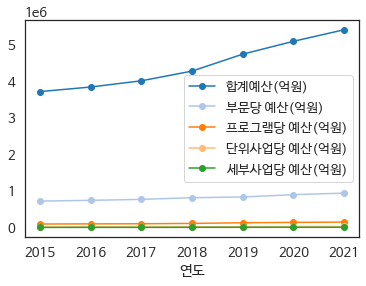

In [47]:
# 연도별 그룹화 각 년도에는 15개 분야의 합이 들어가있다.
gru = df.groupby('연도').sum()
# 2행 부터
gru = gru.iloc[1:]
gru.plot(marker='o') # 판다스 데이터프레임 시각화

* 피벗테이블로 시각화하기

In [77]:
piv=pd.pivot_table(data=df, index='분야', columns='연도', values='합계예산(억원)', sort=False) # sort 를 False 해야 fields 와 순서가 같아진다.
piv.style.background_gradient()

연도,2014,2015,2016,2017,2018,2019,2020,2021
분야,,,,,,,,
사회분야 복지,nan,1070096.000000,1124165.000000,1210037.000000,1360380.000000,1548464.000000,1670211.000000,1850459.000000
농림수산 분야,nan,191130.000000,187369.000000,193670.000000,195821.000000,204327.000000,215153.000000,226557.000000
공공질서 및 안전 분야,nan,167252.000000,174966.000000,183342.000000,188128.000000,202277.000000,208371.000000,223050.000000
국토 및 지역개발 분야,nan,45298.000000,39793.000000,34732.000000,36790.000000,43509.000000,40467.000000,50847.000000
보건 분야,nan,111881.000000,104749.000000,102808.000000,106925.000000,119351.000000,135219.000000,146968.000000
교통 및 물류 분야,nan,208920.000000,190500.000000,184756.000000,152515.000000,162935.000000,191844.000000,214243.000000
과학기술 분야,nan,65070.000000,66769.000000,70076.000000,69809.000000,72507.000000,82413.000000,89798.000000
교육 분야,nan,524707.000000,553716.000000,591921.000000,643411.000000,705300.000000,726344.000000,712076.000000
문화 및 관광 분야,61963.000000,67212.000000,69327.000000,63239.000000,72003.000000,80181.000000,84816.000000,nan


* 연도별 합계예산 추이

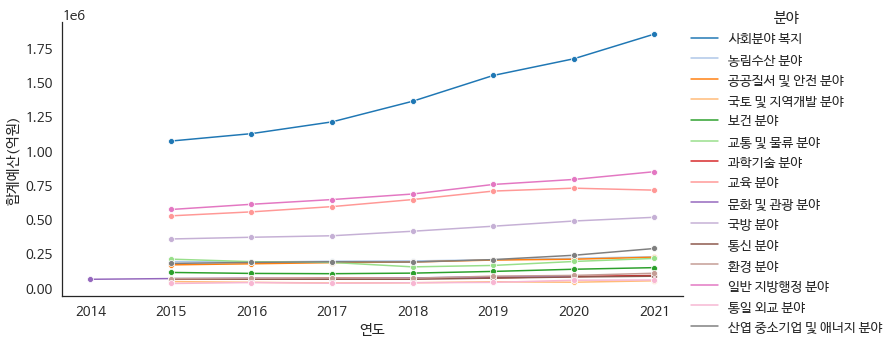

In [65]:
_=sns.relplot(data=df, x='연도', y='합계예산(억원)', kind='line',
              hue='분야', aspect=2, marker='o')

* 연도에 따른 분야별 파이차트

In [76]:
fields

['사회분야 복지',
 '농림수산 분야',
 '공공질서 및 안전 분야',
 '국토 및 지역개발 분야',
 '보건 분야',
 '교통 및 물류 분야',
 '과학기술 분야',
 '교육 분야',
 '문화 및 관광 분야',
 '국방 분야',
 '통신 분야',
 '환경 분야',
 '일반 지방행정 분야',
 '통일 외교 분야',
 '산엽 중소기업 및 애너지 분야']

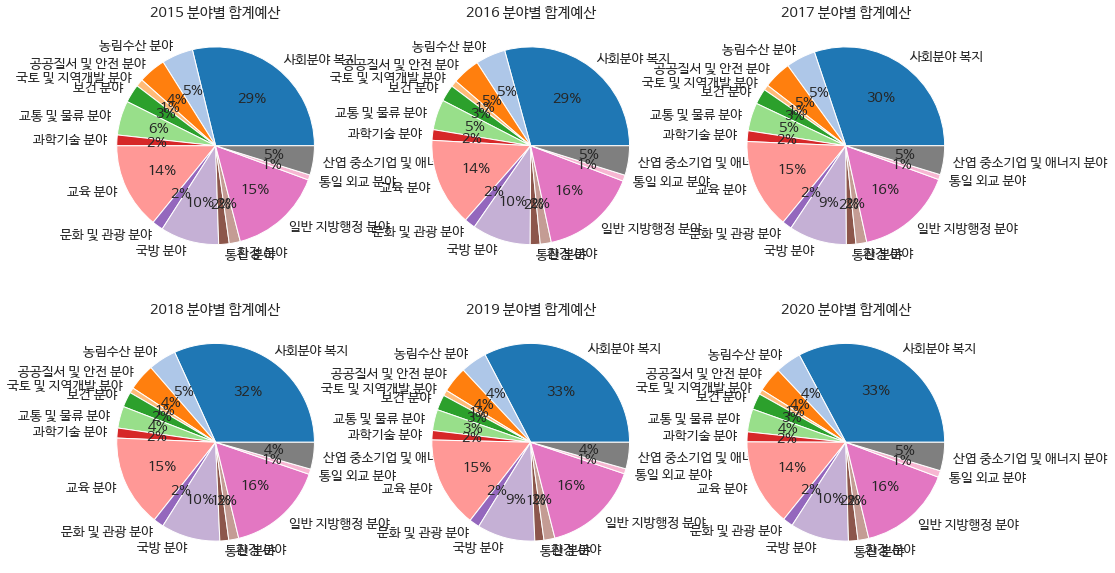

In [81]:
fig, axes=plt.subplots(2,3, figsize=(16,10))
axes = axes.flatten()

for year, ax in zip(range(2015,2021), axes):
  ax.set_title(f'{year} 분야별 합계예산')
  ax.pie(piv[year], labels=fields, autopct='%.0f%%')

  * 정리하기
    - 6년간 전체 예산 금액이 꾸준히 증가
    - 6년간 사회복지 재정 비율이 꾸준히 증가
    - 분야별로는 사회복지, 교육, 지방행정, 국방 순으로 큰 비중을 차지하고 있다 
      

## Step 2 : 따라 해보기
---

https://dacon.io/competitions/official/235767/codeshare/3238?page=1&dtype=random

In [82]:
df_path='/content/gdrive/MyDrive/딥러닝프레임워크실무/Data analysis/데이터  시각화/한국재정정보원_dataset/재정데이터 시각화모델 경진대회 데이터_열린재정/1. 예산'

In [85]:
df1 = pd.read_excel('/content/gdrive/MyDrive/딥러닝프레임워크실무/Data analysis/데이터  시각화/한국재정정보원_dataset/재정데이터 시각화모델 경진대회 데이터_열린재정/1. 예산/1-1-2. 세출 지출 세목 예산편성현황(총액).xlsx',sheet_name='Sheet0')
df1.head()

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,회계년도,소관명,회계명,계정명,분야명,부문명,프로그램명,단위사업명,세부사업명,경비구분,목명,세목명,정부안금액(천원),국회확정금액(천원)
0,2021,5·18민주화운동 진상규명조사위원회,일반회계,NaN,일반·지방행정,일반행정,518 진상규명조사위원회 운영,518 진상규명 지원,518 진상규명지원,주요사업비(기금사업비),보전금,손실보상금,120000.0,120000.0
1,2021,5·18민주화운동 진상규명조사위원회,일반회계,NaN,일반·지방행정,일반행정,518 진상규명조사위원회 운영,518 진상규명 지원,518 진상규명지원,주요사업비(기금사업비),업무추진비,관서업무추진비,39600.0,39600.0
2,2021,5·18민주화운동 진상규명조사위원회,일반회계,NaN,일반·지방행정,일반행정,518 진상규명조사위원회 운영,518 진상규명 지원,518 진상규명지원,주요사업비(기금사업비),업무추진비,사업추진비,2000.0,2000.0
3,2021,5·18민주화운동 진상규명조사위원회,일반회계,NaN,일반·지방행정,일반행정,518 진상규명조사위원회 운영,518 진상규명 지원,518 진상규명지원,주요사업비(기금사업비),여비,국내여비,779647.0,779647.0
4,2021,5·18민주화운동 진상규명조사위원회,일반회계,NaN,일반·지방행정,일반행정,518 진상규명조사위원회 운영,518 진상규명 지원,518 진상규명지원,주요사업비(기금사업비),여비,국외업무여비,17000.0,17000.0


In [87]:
df_work = df1[df1.iloc[:,1]=='고용노동부'] # 고용노동부에서 시행한 자료를 추린후
df_young = df_work[df_work.loc[:,'단위사업명'].str.contains('청년')] # 청년에 관련된 사업만 뽑아냄.

In [120]:
df_young

,회계년도,소관명,회계명,계정명,분야명,부문명,프로그램명,단위사업명,세부사업명,경비구분,목명,세목명,정부안금액(천원),국회확정금액(천원)
1479,2021,고용노동부,고용보험기금,NaN,사회복지,고용,고용창출및훈련,청년내일채움공제(고보),청년내일채움공제(고보),주요사업비(기금사업비),민간이전,민간경상보조,442898677.0,442898677.0
1480,2021,고용노동부,고용보험기금,NaN,사회복지,고용,고용창출및훈련,청년내일채움공제(고보),청년내일채움공제(고보),주요사업비(기금사업비),업무추진비,사업추진비,51000.0,51000.0
1481,2021,고용노동부,고용보험기금,NaN,사회복지,고용,고용창출및훈련,청년내일채움공제(고보),청년내일채움공제(고보),주요사업비(기금사업비),여비,국내여비,49000.0,49000.0
1482,2021,고용노동부,고용보험기금,NaN,사회복지,고용,고용창출및훈련,청년내일채움공제(고보),청년내일채움공제(고보),주요사업비(기금사업비),연구용역비,일반연구비,80000.0,80000.0
1483,2021,고용노동부,고용보험기금,NaN,사회복지,고용,고용창출및훈련,청년내일채움공제(고보),청년내일채움공제(고보),주요사업비(기금사업비),운영비,일반수용비,713000.0,713000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378166,2011,고용노동부,일반회계,NaN,사회복지,노동,고용정책,청년취업아카데미운영지원,청년녹색일자리확산홍보,주요사업비(기금사업비),운영비,일반수용비,700000.0,500000.0
378167,2011,고용노동부,일반회계,NaN,사회복지,노동,고용정책,청년취업아카데미운영지원,청년취업아카데미운영지원,주요사업비(기금사업비),민간이전,민간경상보조,37587800.0,30447800.0
378168,2011,고용노동부,일반회계,NaN,사회복지,노동,고용정책,청년취업아카데미운영지원,청년취업아카데미운영지원,주요사업비(기금사업비),업무추진비,사업추진비,10000.0,10000.0
378169,2011,고용노동부,일반회계,NaN,사회복지,노동,고용정책,청년취업아카데미운영지원,청년취업아카데미운영지원,주요사업비(기금사업비),운영비,위탁사업비,200000.0,200000.0


In [88]:
total_work = df_work.groupby(['회계년도'])['국회확정금액(천원)'].sum() # 고용노동부 시행정책을 회계년도로 그룹을 묶고 그중 국회확정금액만 뽑아냄.

In [122]:
total_work

회계년도
2011    1.984873e+10
2012    2.169225e+10
2013    2.367479e+10
2014    2.713986e+10
2015    2.751762e+10
2016    3.009016e+10
2017    3.117234e+10
2018    4.152433e+10
2019    4.163192e+10
2020    4.447757e+10
2021    5.171080e+10
Name: 국회확정금액(천원), dtype: float64

In [90]:
subtotal_young = df_young.groupby(['회계년도'])['국회확정금액(천원)'].sum() # 청년 관련 사업을 회계년도로 묶고 국회확정금액만 추려냄.

In [93]:
young_ratio = pd.DataFrame(subtotal_young/total_work) # 청년 관련 정책의 비중 -> 청년관련 정책 / 전체 정책

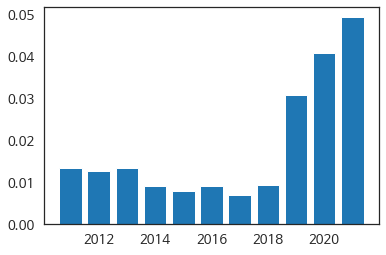

In [94]:
plt.bar(young_ratio.index.values,young_ratio.iloc[:,0]) # 2019년 부터 급증하지만 5% 미만으로 비중이 크지는 않다.
plt.show()

In [95]:
df_young_3 = df_young[df_young.loc[:,'회계년도']>=2019] # 청년관련 사업중 3년간의 것만 뽑아냄.(19~21년)

In [124]:
df_young_3

,회계년도,소관명,회계명,계정명,분야명,부문명,프로그램명,단위사업명,세부사업명,경비구분,목명,세목명,정부안금액(천원),국회확정금액(천원)
1479,2021,고용노동부,고용보험기금,NaN,사회복지,고용,고용창출및훈련,청년내일채움공제(고보),청년내일채움공제(고보),주요사업비(기금사업비),민간이전,민간경상보조,442898677.0,442898677.0
1480,2021,고용노동부,고용보험기금,NaN,사회복지,고용,고용창출및훈련,청년내일채움공제(고보),청년내일채움공제(고보),주요사업비(기금사업비),업무추진비,사업추진비,51000.0,51000.0
1481,2021,고용노동부,고용보험기금,NaN,사회복지,고용,고용창출및훈련,청년내일채움공제(고보),청년내일채움공제(고보),주요사업비(기금사업비),여비,국내여비,49000.0,49000.0
1482,2021,고용노동부,고용보험기금,NaN,사회복지,고용,고용창출및훈련,청년내일채움공제(고보),청년내일채움공제(고보),주요사업비(기금사업비),연구용역비,일반연구비,80000.0,80000.0
1483,2021,고용노동부,고용보험기금,NaN,사회복지,고용,고용창출및훈련,청년내일채움공제(고보),청년내일채움공제(고보),주요사업비(기금사업비),운영비,일반수용비,713000.0,713000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82769,2019,고용노동부,일반회계,NaN,사회복지,고용,고용창출및훈련,청년진로및취업지원(일반),해외취업지원,주요사업비(기금사업비),업무추진비,사업추진비,10000.0,10000.0
82770,2019,고용노동부,일반회계,NaN,사회복지,고용,고용창출및훈련,청년진로및취업지원(일반),해외취업지원,주요사업비(기금사업비),여비,국내여비,3880.0,3880.0
82771,2019,고용노동부,일반회계,NaN,사회복지,고용,고용창출및훈련,청년진로및취업지원(일반),해외취업지원,주요사업비(기금사업비),여비,국외업무여비,34380.0,34380.0
82772,2019,고용노동부,일반회계,NaN,사회복지,고용,고용창출및훈련,청년진로및취업지원(일반),해외취업지원,주요사업비(기금사업비),운영비,일반수용비,18740.0,18740.0


In [96]:
df_young_3_total = pd.DataFrame(df_young_3.groupby(['회계년도', '세부사업명'])['국회확정금액(천원)'].sum())
df_young_3_total.reset_index(inplace=True)

In [97]:
df_young_3_pivot = pd.DataFrame(df_young_3.groupby(['회계년도','세부사업명'])['국회확정금액(천원)'].sum().unstack()).fillna(0)
df_young_3_pivot

세부사업명,고용보험기금 전출(청년 및 적극적 노동시장정책 지원),인문특화청년취업아카데미,직업정보제공및직업지도,청년구직활동지원금,청년내일채움공제,청년내일채움공제(고보),청년내일채움공제(일반),청년일자리창출지원,청년취업아카데미,청년취업진로 및 일경험 지원,한국잡월드운영,한국잡월드운영지원,해외취업지원,호남권직업체험센터설립
회계년도,,,,,,,,,,,,,,
2019,0.0,21121000.0,0.0,158186000.0,997132000.0,0.0,0.0,0.0,0.0,26041000.0,21180000.0,0.0,56002000.0,0.0
2020,400000000.0,0.0,0.0,0.0,0.0,503268000.0,778704000.0,0.0,18444000.0,26041000.0,25449000.0,0.0,59574000.0,8085000.0
2021,580000000.0,0.0,3811000.0,0.0,0.0,493592000.0,908102000.0,467600000.0,0.0,21931000.0,0.0,26962000.0,52625000.0,0.0


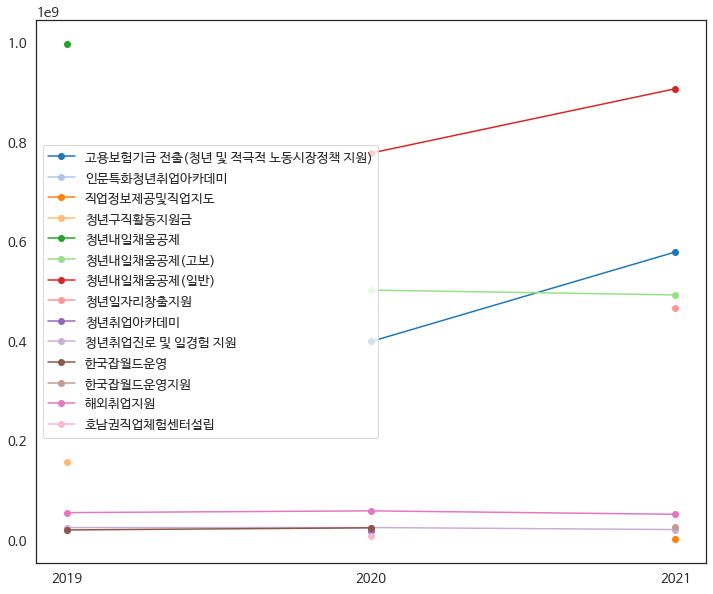

In [98]:
plt.figure(figsize=(12,10))
ax = plt.subplot()
for i in sorted(pd.Series.unique(df_young_3_total['세부사업명'])) :
    x = df_young_3_total[df_young_3_total['세부사업명'] == i]['회계년도']
    y = df_young_3_total[df_young_3_total['세부사업명'] == i]['국회확정금액(천원)']
    plt.plot(x, y, label=i,marker='o')
plt.legend(loc=6)
ax.set_xticks([2019, 2020, 2021])
plt.show()

In [ ]:
# 청년내일채움공제가 가장 높게 나타남(일반 = 35.5, 고보 = 19.3 )
# 고용보험기금 전출이 두번째로 크다.(22.7%)
# 3번째가 청년일자리창출지원 으로 나타났다.(18.3%)

In [99]:
df_young_3_total_2021 = df_young_3_total[df_young_3_total['회계년도']==2021]
df_young_3_total_2021_ratio = df_young_3_total_2021['국회확정금액(천원)']/df_young_3_total_2021['국회확정금액(천원)'].sum(axis=0)
df_young_3_total_2021_label = df_young_3_total_2021['세부사업명']

In [100]:
df_young_2021_pie = pd.DataFrame({'비율': df_young_3_total_2021_ratio,'세부사업명': df_young_3_total_2021_label}).sort_values(by='비율',ascending=False)

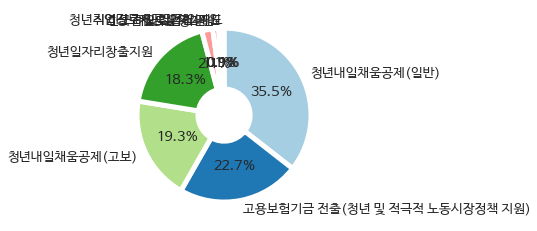

In [101]:
palette = sns.color_palette("bright")
sns.set_palette("Paired")

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}

plt.pie(df_young_2021_pie['비율'], labels=df_young_2021_pie['세부사업명'], autopct='%.1f%%', wedgeprops=wedgeprops, startangle=90, counterclock=False)
plt.show()

In [102]:
df_young_else = df_work[-df_work.loc[:,'단위사업명'].str.contains('청년')]

In [103]:
len(pd.Series.unique(df_young_else['단위사업명']))

241

In [104]:
df_young_else_3 = df_young_else[df_young_else.loc[:,'회계년도']>=2019]

In [105]:
df_young_else_3_check = df_young_else_3.groupby(['세부사업명']).sum().sort_values(by='국회확정금액(천원)', ascending=False)
df_young_else_3_check.reset_index(inplace=True)

In [106]:
df_young_else_3_check.iloc[0:10,:]

,세부사업명,회계년도,정부안금액(천원),국회확정금액(천원)
0,구직급여,6060,2.827370e+10,2.804716e+10
1,비통화금융기관 예치,6060,2.532902e+10,2.531573e+10
2,산재보험급여,6060,1.746466e+10,1.749816e+10
3,비통화금융기관예치,18180,1.295277e+10,1.237161e+10
4,일자리안정자금지원,68678,6.280104e+09,6.280104e+09
5,공공자금관리기금(총괄계정) 예탁,30300,4.610000e+09,4.610000e+09
6,모성보호육아지원,6060,4.590061e+09,4.590061e+09
7,사회보험사각지대해소,36360,3.329459e+09,3.301290e+09
8,고용창출장려금,52519,2.277543e+09,2.201793e+09
9,내일배움카드(고보),40410,1.581317e+09,1.580817e+09


In [107]:
for i in range(len(df_young_else_3)):
    df_young_else_3.iloc[i,8] = df_young_else_3.iloc[i,8].replace(' ','')

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [108]:
df_young_else_3_check = df_young_else_3.groupby(['세부사업명']).sum().sort_values(by='국회확정금액(천원)', ascending=False)
df_young_else_3_check.reset_index(inplace=True)

In [109]:
df_young_else_top10 = pd.DataFrame(df_young_else_3_check.iloc[0:10,0])

In [110]:
df_young_else_top10

,세부사업명
0,비통화금융기관예치
1,구직급여
2,산재보험급여
3,일자리안정자금지원
4,공공자금관리기금(총괄계정)예탁
5,모성보호육아지원
6,사회보험사각지대해소
7,고용창출장려금
8,내일배움카드(고보)
9,체당금지급


In [111]:
df_young_else_3_f = pd.merge(df_young_else_top10, df_young_else_3, on='세부사업명')

In [112]:
df_young_else_3_total = pd.DataFrame(df_young_else_3_f.groupby(['회계년도', '세부사업명'])['국회확정금액(천원)'].sum())
df_young_else_3_total.reset_index(inplace=True)

In [113]:
df_young_else_3_pivot = pd.DataFrame(df_young_else_3_f.groupby(['회계년도','세부사업명'])['국회확정금액(천원)'].sum().unstack()).fillna(0)
df_young_else_3_pivot

세부사업명,고용창출장려금,공공자금관리기금(총괄계정)예탁,구직급여,내일배움카드(고보),모성보호육아지원,비통화금융기관예치,사회보험사각지대해소,산재보험급여,일자리안정자금지원,체당금지급
회계년도,,,,,,,,,,
2019,8.722170e+08,8.600000e+08,7.182783e+09,0.0,1.455276e+09,1.360522e+10,1.341932e+09,5.069964e+09,2.818824e+09,411423000.0
2020,1.143095e+09,8.000000e+08,9.515779e+09,780316000.0,1.543248e+09,1.228076e+10,1.149011e+09,5.904634e+09,2.164716e+09,433460000.0
2021,1.864810e+08,2.950000e+09,1.134860e+10,800501000.0,1.591537e+09,1.180136e+10,8.103470e+08,6.523565e+09,1.296564e+09,669831000.0


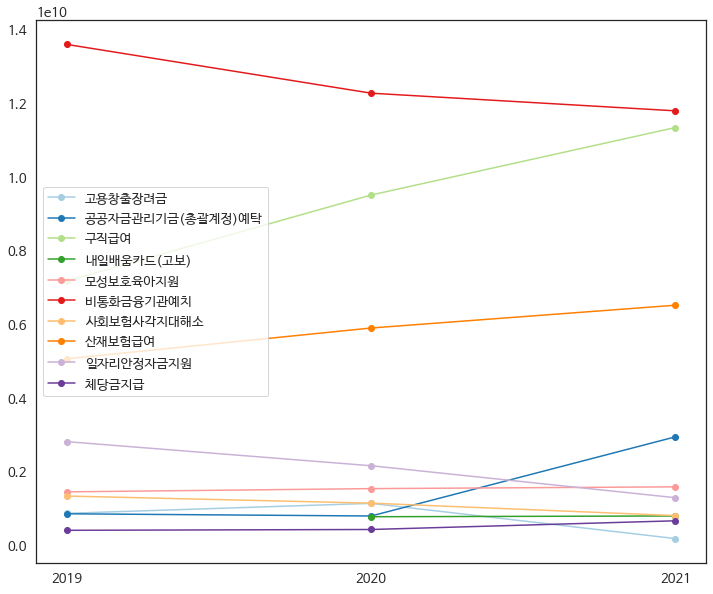

In [114]:
plt.figure(figsize=(12,10))
ax = plt.subplot()
for i in sorted(pd.Series.unique(df_young_else_3_total['세부사업명'])) :
    x = df_young_else_3_total[df_young_else_3_total['세부사업명'] == i]['회계년도']
    y = df_young_else_3_total[df_young_else_3_total['세부사업명'] == i]['국회확정금액(천원)']
    plt.plot(x, y, label=i,marker='o')
plt.legend(loc=6)
ax.set_xticks([2019, 2020, 2021])
plt.show()

## Step 3: 스스로 해보기
---

* 주제: 

In [131]:
df_path='/content/gdrive/MyDrive/딥러닝프레임워크실무/Data analysis/데이터  시각화/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출'

In [139]:
df = pd.read_csv('/content/gdrive/MyDrive/딥러닝프레임워크실무/Data analysis/데이터  시각화/한국재정정보원_dataset/2021_한국재정정보원_공공데이터/분야별 재정지출/사회복지 분야/사회복지 분야 부문별 추이.CSV',encoding='CP949')

In [140]:
df

,연도,기준,공적연금(억원),주택(억원),기초생활보장(억원),보훈(억원),취약계층지원(억원),사회복지일반(억원),노동(억원),고용(억원),고용노동일반(억원),노인·청소년(억원),보육·가족 및 여성(억원),노인(억원),아동·보육(억원),여성·가족·청소년(억원)
0,2015,결산,387826,207833,94017,46020,23567,7309,158543,0,0,88554,56425,0,0,0
1,2016,결산,408608,211736,102540,47868,25311,8186,169205,0,0,92348,58364,0,0,0
2,2017,결산,440219,237217,109372,49663,26836,8201,178568,0,0,100415,59544,0,0,0
3,2018,결산,469045,258033,115541,54258,29780,11392,240695,0,0,114155,67482,0,0,0
4,2019,결산,505914,288957,128731,54776,36680,12851,72934,207532,4668,0,0,142070,82142,11210
5,2020,본예산,554491,297314,139659,57345,39603,14215,77133,222759,5291,0,0,166323,85127,10950
6,2021,본예산,600408,335184,153243,58866,45132,14749,92595,258402,5574,0,0,188723,85582,12001


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   연도              7 non-null      int64 
 1   기준              7 non-null      object
 2   공적연금(억원)        7 non-null      int64 
 3   주택(억원)          7 non-null      int64 
 4   기초생활보장(억원)      7 non-null      int64 
 5   보훈(억원)          7 non-null      int64 
 6   취약계층지원(억원)      7 non-null      int64 
 7   사회복지일반(억원)      7 non-null      int64 
 8   노동(억원)          7 non-null      int64 
 9   고용(억원)          7 non-null      int64 
 10  고용노동일반(억원)      7 non-null      int64 
 11  노인·청소년(억원)      7 non-null      int64 
 12  보육·가족 및 여성(억원)  7 non-null      int64 
 13  노인(억원)          7 non-null      int64 
 14  아동·보육(억원)       7 non-null      int64 
 15  여성·가족·청소년(억원)   7 non-null      int64 
dtypes: int64(15), object(1)
memory usage: 1.0+ KB


In [142]:
df = df.drop(['기준'],axis=1) # 기준을 지운다.

In [164]:
df

,연도,공적연금(억원),주택(억원),기초생활보장(억원),보훈(억원),취약계층지원(억원),사회복지일반(억원),노동(억원),고용(억원),고용노동일반(억원),노인·청소년(억원),보육·가족 및 여성(억원),노인(억원),아동·보육(억원),여성·가족·청소년(억원)
0,2015,387826,207833,94017,46020,23567,7309,158543,0,0,88554,56425,0,0,0
1,2016,408608,211736,102540,47868,25311,8186,169205,0,0,92348,58364,0,0,0
2,2017,440219,237217,109372,49663,26836,8201,178568,0,0,100415,59544,0,0,0
3,2018,469045,258033,115541,54258,29780,11392,240695,0,0,114155,67482,0,0,0
4,2019,505914,288957,128731,54776,36680,12851,72934,207532,4668,0,0,142070,82142,11210
5,2020,554491,297314,139659,57345,39603,14215,77133,222759,5291,0,0,166323,85127,10950
6,2021,600408,335184,153243,58866,45132,14749,92595,258402,5574,0,0,188723,85582,12001


In [180]:
a = df.iloc[:,3] # 기초 생활보장
b = df.iloc[:,5] # 취약계층지원

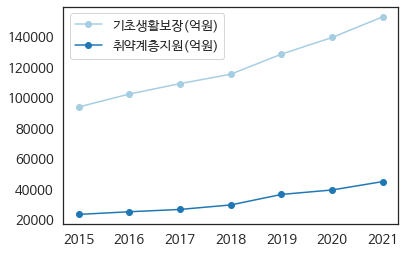

In [184]:
plt.plot(x, a, label='기초생활보장(억원)', marker='o')
plt.plot(x, b, label='취약계층지원(억원)', marker='o')
plt.legend()

In [ ]:
# 기초생활보장금액은 매년 꾸준히 증가하고 있다.
# 취약계층지원금 또한 기초생활보장금액에 비해 미세하지만 꾸준히 증가하는 추세를 보인다.

In [189]:
x = df.iloc[:,0] # 연도
y = df.iloc[:,10] # 노인·청소년(억원)
z = df.iloc[:,11] # 보육·가족 및 여성(억원)
v = df.iloc[:,12] # 노인(억원)
c = df.iloc[:,13] # 아동·보육(억원)
n = df.iloc[:,14] # 여성·가족·청소년(억원)

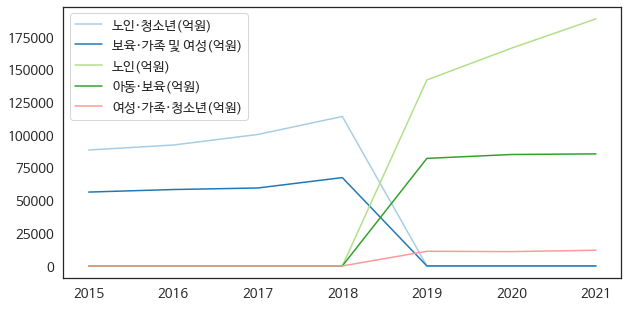

In [191]:
plt.figure(figsize=(10, 5))
plt.plot(x, y, label='노인·청소년(억원)')
plt.plot(x, z, label='보육·가족 및 여성(억원)')
plt.plot(x, v, label='노인(억원)')
plt.plot(x, c, label='아동·보육(억원)')
plt.plot(x, n, label='여성·가족·청소년(억원)')
plt.legend()

In [ ]:
# 재미있는 점은 2018년을 기준으로 지원금액이 끊기거나 새로운 그룹이 생긴것이 아니라 원래 있던 그룹이 재편성 되어서 지원금이 설정 되었다는 점이다.
# (노인.청소년), (보육.가족 및 여성) 두가지 밖에 없었던 카테고리를 재편성해서 3개의 그룹(노인), (아동.보육), (여성.가족.청소년) 으로 늘렸다.

In [193]:
dfs = df.groupby('연도').sum()
dfs

,공적연금(억원),주택(억원),기초생활보장(억원),보훈(억원),취약계층지원(억원),사회복지일반(억원),노동(억원),고용(억원),고용노동일반(억원),노인·청소년(억원),보육·가족 및 여성(억원),노인(억원),아동·보육(억원),여성·가족·청소년(억원)
연도,,,,,,,,,,,,,,
2015,387826,207833,94017,46020,23567,7309,158543,0,0,88554,56425,0,0,0
2016,408608,211736,102540,47868,25311,8186,169205,0,0,92348,58364,0,0,0
2017,440219,237217,109372,49663,26836,8201,178568,0,0,100415,59544,0,0,0
2018,469045,258033,115541,54258,29780,11392,240695,0,0,114155,67482,0,0,0
2019,505914,288957,128731,54776,36680,12851,72934,207532,4668,0,0,142070,82142,11210
2020,554491,297314,139659,57345,39603,14215,77133,222759,5291,0,0,166323,85127,10950
2021,600408,335184,153243,58866,45132,14749,92595,258402,5574,0,0,188723,85582,12001


In [ ]:
dfs=dfs.drop(['노인·청소년(억원)'],axis=1)

In [202]:
dfs=dfs.drop(['보육·가족 및 여성(억원)'],axis=1)

In [207]:
dfs=dfs.iloc[4:,:]

In [208]:
dfs # 19년 부터 21년 근 3년간의 데이터만 뽑아냄 (결측치가 있는 년도 제외)

,공적연금(억원),주택(억원),기초생활보장(억원),보훈(억원),취약계층지원(억원),사회복지일반(억원),노동(억원),고용(억원),고용노동일반(억원),노인(억원),아동·보육(억원),여성·가족·청소년(억원)
연도,,,,,,,,,,,,
2019,505914,288957,128731,54776,36680,12851,72934,207532,4668,142070,82142,11210
2020,554491,297314,139659,57345,39603,14215,77133,222759,5291,166323,85127,10950
2021,600408,335184,153243,58866,45132,14749,92595,258402,5574,188723,85582,12001


In [212]:
dfs.columns

Index(['공적연금(억원)', '주택(억원)', '기초생활보장(억원)', '보훈(억원)', '취약계층지원(억원)',
       '사회복지일반(억원)', '노동(억원)', '고용(억원)', '고용노동일반(억원)', '노인(억원)', '아동·보육(억원)',
       '여성·가족·청소년(억원)'],
      dtype='object')

In [217]:
dfs.iloc[0,:]

공적연금(억원)         505914
주택(억원)           288957
기초생활보장(억원)       128731
보훈(억원)            54776
취약계층지원(억원)        36680
사회복지일반(억원)        12851
노동(억원)            72934
고용(억원)           207532
고용노동일반(억원)         4668
노인(억원)           142070
아동·보육(억원)         82142
여성·가족·청소년(억원)     11210
Name: 2019, dtype: int64

In [220]:
field=['공적연금(억원)', '주택(억원)', '기초생활보장(억원)', '보훈(억원)', '취약계층지원(억원)',
       '사회복지일반(억원)', '노동(억원)', '고용(억원)', '고용노동일반(억원)', '노인(억원)', '아동·보육(억원)',
       '여성·가족·청소년(억원)']

Text(0.5, 1.0, '2021년 사회복지금')

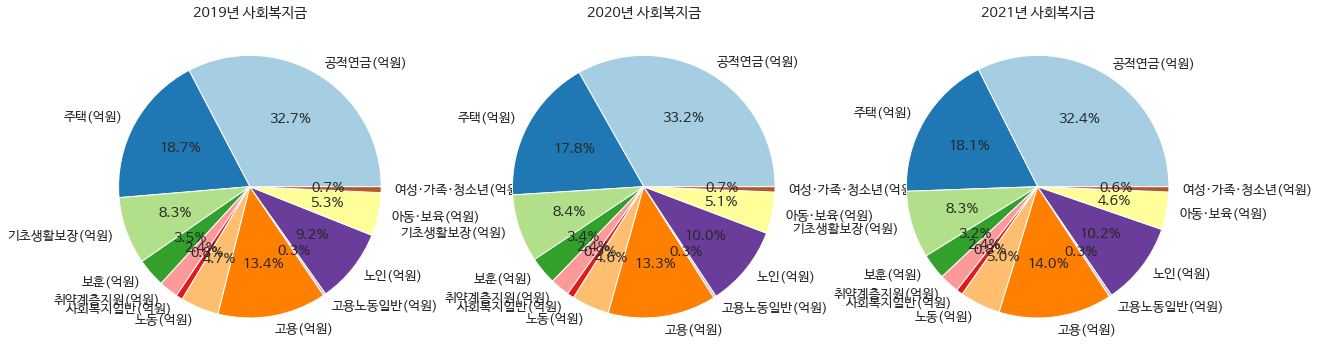

In [235]:
plt.figure(figsize=(20, 10))

plt.subplot(1,3,1)
_=plt.pie(dfs.iloc[0,:],labels=field, autopct='%.1f%%')
plt.title('2019년 사회복지금')

plt.subplot(1,3,2)
_=plt.pie(dfs.iloc[1,:],labels=field, autopct='%.1f%%')
plt.title('2020년 사회복지금')

plt.subplot(1,3,3)
_=plt.pie(dfs.iloc[2,:],labels=field, autopct='%.1f%%')
plt.title('2021년 사회복지금')

In [ ]:
# 2019년 부터 2021년 까지 3년 간의 데이터를 파이차트로 낸 결과
# 공적연금의 비율이 가장 컸고 2020년에 가장 비율이 높았다.
# 두번째가 주택 관련 지원금
# 세번째로 비율이 큰 것이 고용 관련 지원금이었다.
# 대부분의 금액 비율은 일정했고 큰 변동은 없었다.